# Multi threading Assignment
## Ikjot Singh
## 102116071
## 3CS11

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import threading, multiprocessing

### Random Matrix Generator of order 1k*1k

In [2]:
def random_matrix():
    return np.random.rand(1000, 1000)
x=random_matrix()

### Constant matrix of order 1k*1k
*taking 2 x Identity matrix as the constant matrix for this case*

In [3]:
y = np.eye(1000)
y=y*2

### Task Function: multiply matrices 

In [4]:
def multiply_matrix():
    print(np.dot(random_matrix(), y))
    return np.dot(random_matrix(), y)

### Displaying number of cores and active threads

In [5]:
numberOfCores = multiprocessing.cpu_count()
print ("Num of cores are: ", numberOfCores)

activeThread = threading.active_count()
print ("Num of threads: ",activeThread)

Num of cores are:  8
Num of threads:  6


### Parametrized function for Threading
*takes number of threads as input and returns the time taken by the process*

In [6]:
def threadfn(numberOfThreads):
  startTime = time.time()
  activeThreads = threading.active_count()
  print("Program Started....")
  for i in range(100):
      t = threading.Thread(target=random_matrix)
      t.start()
      while True:
        if threading.active_count() - activeThreads + 1 <= numberOfThreads:
          break
        time.sleep(1)

  while True:
      if threading.active_count() == activeThreads:
          break
      else:
          print ("Thread still running (left %d)..."%(threading.active_count() - activeThreads))
          time.sleep(1)
    
  print("All Thread ends")

  print("Program Finished")
  print("Total Time %f sec" % (round( time.time() - startTime,4)))
  x=round( time.time() - startTime,4)
  
  return x  

### Creating a dataframe to store results

In [7]:
df = pd.DataFrame(columns=['threads', 'time'])
def add_data(t, m):
    df.loc[len(df)] = [t, m]
    return df

### Running the code for threads 1 to 8

In [8]:
for i in range(1,9):
    t=threadfn(i)
    add_data(i, int(t))

Program Started....
All Thread ends
Program Finished
Total Time 100.125100 sec
Program Started....
All Thread ends
Program Finished
Total Time 50.091800 sec
Program Started....
Thread still running (left 1)...
All Thread ends
Program Finished
Total Time 34.070500 sec
Program Started....
All Thread ends
Program Finished
Total Time 25.062600 sec
Program Started....
All Thread ends
Program Finished
Total Time 20.051500 sec
Program Started....
Thread still running (left 4)...
All Thread ends
Program Finished
Total Time 17.051300 sec
Program Started....
Thread still running (left 2)...
All Thread ends
Program Finished
Total Time 15.050800 sec
Program Started....
Thread still running (left 4)...
All Thread ends
Program Finished
Total Time 13.043000 sec


### Displaying Results

In [9]:
df

,threads,time
0,1,100
1,2,50
2,3,34
3,4,25
4,5,20
5,6,17
6,7,15
7,8,13


### Plotting the results

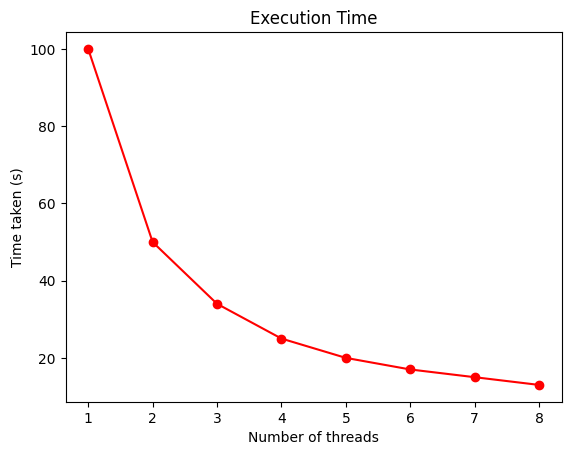

In [10]:
plt.plot(df['threads'], df['time'], marker='o', color='r', label='Time taken vs Number of threads')
plt.xlabel('Number of threads')
plt.ylabel('Time taken (s)')
plt.title('Execution Time')
plt.show()